In [34]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from sklearn import preprocessing

In [35]:
raw_data = pd.read_csv('D:\Data_science\Iris_Flower\iris.data')

raw_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Preprocessing

In [36]:
data = raw_data

#Target map

target_map = {'Iris-setosa':0, 
              'Iris-versicolor':1,
              'Iris-virginica':2 }

#Apply the target map to Data
data['species'] = data['species'].apply(lambda x: target_map[x])


data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [37]:
data.shape

(150, 5)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [66]:
round(data.describe(),2)

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.00,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20,1.00
std,0.83,0.43,1.76,0.76,0.82
min,4.30,2.00,1.00,0.10,0.00
25%,5.10,2.80,1.60,0.30,0.00
50%,5.80,3.00,4.35,1.30,1.00
75%,6.40,3.30,5.10,1.80,2.00
max,7.90,4.40,6.90,2.50,2.00


In [40]:
# to display n. of samples on each class
data['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [41]:
# check for null values
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Data Visualization

c:\Users\Pichau\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\Pichau\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Pichau\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Pichau\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distp

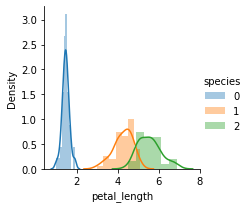

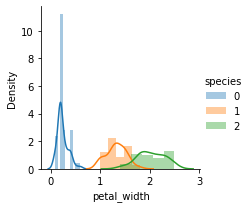

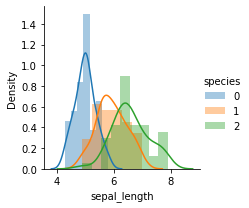

In [68]:
#plot each flower to a histogram

sns.FacetGrid(data,hue="species",size=3).map(sns.distplot,"petal_length").add_legend()
sns.FacetGrid(data,hue="species",size=3).map(sns.distplot,"petal_width").add_legend()
sns.FacetGrid(data,hue="species",size=3).map(sns.distplot,"sepal_length").add_legend()
plt.show()

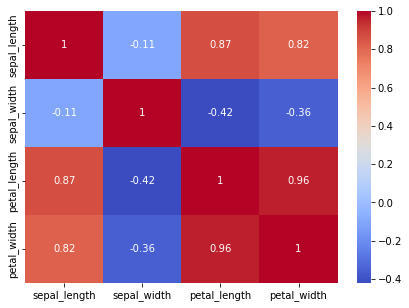

In [42]:
#Features Correlation

corr = data.iloc[:,0:4].corr()
plt.figure(figsize=(7,5)) 
sns.heatmap(corr,annot=True,cmap='coolwarm') 
plt.show()

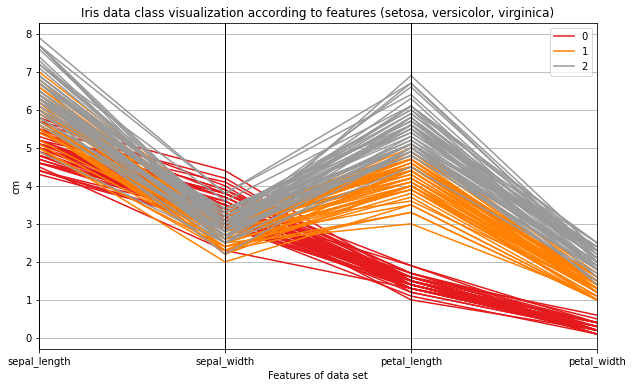

In [43]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(10,6))
parallel_coordinates(data, 'species', colormap=plt.get_cmap("Set1"))
plt.title("Iris data class visualization according to features (setosa, versicolor, virginica)")
plt.xlabel("Features of data set")
plt.ylabel("cm")
#plt.savefig('parallel_coordinates.png')
plt.show()

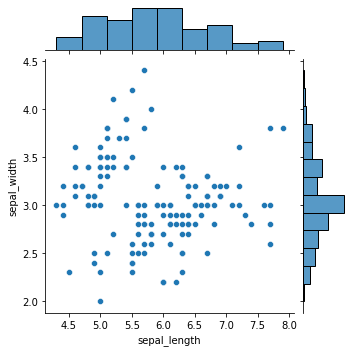

In [44]:
sns.jointplot(x="sepal_length", y="sepal_width", data=data, height=5)

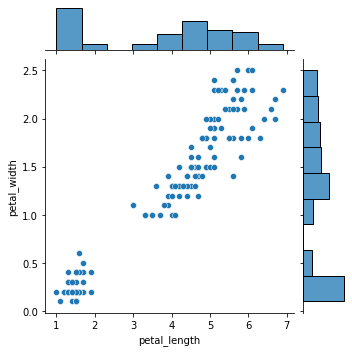

In [45]:
sns.jointplot(x="petal_length", y="petal_width", data=data, height=5)

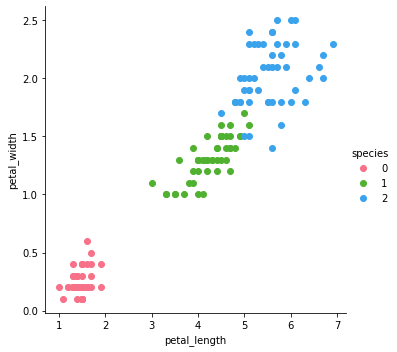

In [46]:
sns.FacetGrid(data, hue="species", palette="husl", height=5) \
   .map(plt.scatter, "petal_length", "petal_width") \
   .add_legend()

array([[<AxesSubplot:title={'center':'petal_length'}, xlabel='[species]'>,
        <AxesSubplot:title={'center':'petal_width'}, xlabel='[species]'>],
       [<AxesSubplot:title={'center':'sepal_length'}, xlabel='[species]'>,
        <AxesSubplot:title={'center':'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

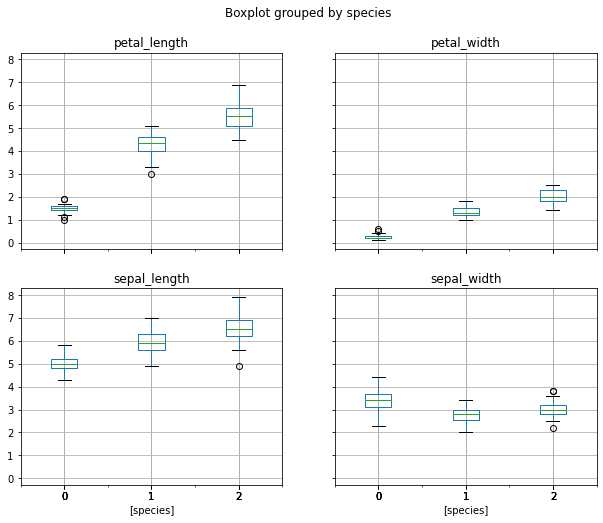

In [47]:
data.boxplot(by="species", figsize=(10, 8))

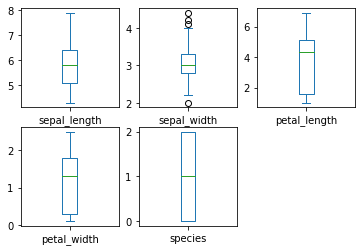

In [48]:
# Box and whisker plots(Give idea about distribution of input attributes)
data.plot(kind = 'box', subplots = True, layout = (2, 3), sharex = False, sharey = False)
plt.show()

<AxesSubplot:xlabel='species', ylabel='petal_length'>

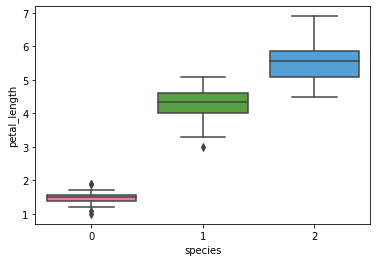

In [49]:
sns.boxplot(x="species", y="petal_length", palette="husl", data=data)

<AxesSubplot:xlabel='species', ylabel='petal_length'>

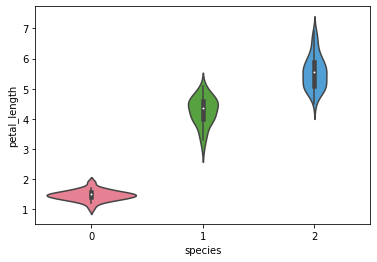

In [50]:
sns.violinplot(x="species", y="petal_length", palette="husl", data=data)

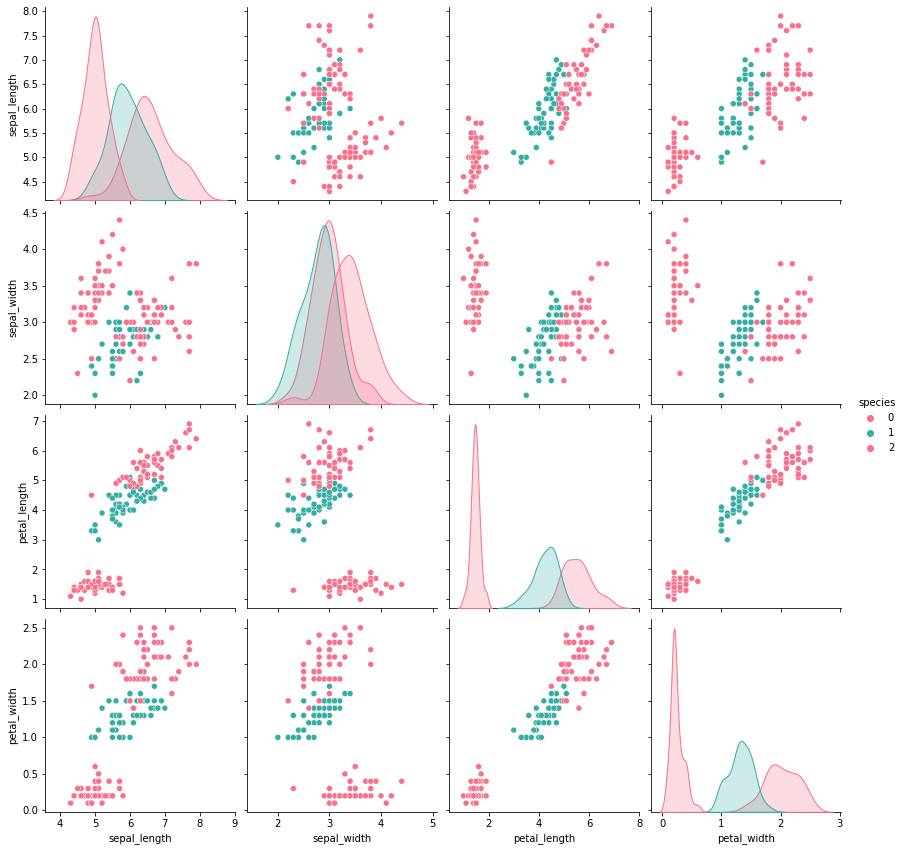

In [51]:
sns.pairplot(data, hue="species", palette="husl", height=3)

<AxesSubplot:>

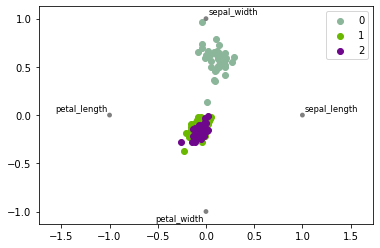

In [52]:
from pandas.plotting import radviz
radviz(data, "species")

## Normalize

In [53]:
x = data.iloc[:,0:4]
X = preprocessing.normalize(x)

y = data.iloc[:,4]

In [54]:
print('X')
print(type(X))
print(X.shape)
print('=========================')
print('y')
print(type(y))
print(y.shape)

X
<class 'numpy.ndarray'>
(150, 4)
y
<class 'pandas.core.series.Series'>
(150,)


# Machine Learning

In [55]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [56]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap

test_size = 0.30
seed = 7
score = 'accuracy'

def models(X_train, Y_train,score):
    clfs = []
    result = []
    names = []
    clfs.append(('LR', LogisticRegression()))
    clfs.append(('LDA', LinearDiscriminantAnalysis()))
    clfs.append(('KNN', KNeighborsClassifier(n_neighbors=3)))
    clfs.append(('CART', DecisionTreeClassifier()))
    clfs.append(('NB', GaussianNB()))
    clfs.append(('SVM', SVC()))
    clfs.append(('KMS', KMeans(n_clusters=3)))
    for algo_name, clf in clfs:
        k_fold = model_selection.KFold(n_splits=10, random_state=None)
        cv_score = model_selection.cross_val_score(clf, X_train, Y_train, cv=k_fold, scoring=score)
        result.append((algo_name,cv_score.mean(), cv_score.std()))
        names.append(algo_name)
    return (result)


print('Model, Mean, Std')
models(x_train, y_train, score)

Model, Mean, Std


[('LR', 0.7423076923076923, 0.14713481418161353),
 ('LDA', 0.9478021978021978, 0.03424712536757673),
 ('KNN', 0.9703296703296704, 0.03638009968625679),
 ('CART', 0.9554945054945054, 0.04842963241630837),
 ('NB', 0.9631868131868131, 0.04877747059333228),
 ('SVM', 0.956043956043956, 0.04808869557591443),
 ('KMS', 0.1576923076923077, 0.1836192710761651)]

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



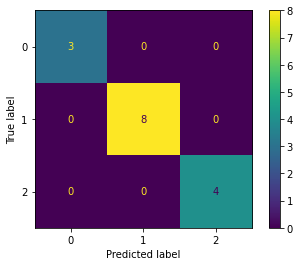

In [57]:
# Evaluation of the Classifier 
# Predictions on test dataset
svm = SVC()
svm.fit(x_train, y_train)
pred_svm = svm.predict(x_test)
print(accuracy_score(y_test, pred_svm))
print(classification_report(y_test, pred_svm))

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, pred_svm)

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



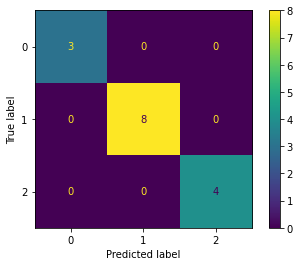

In [58]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)
print(accuracy_score(y_test, pred_knn))
print(classification_report(y_test, pred_knn))

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, pred_knn)

0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       3.0
           1       0.00      0.00      0.00       8.0
           2       0.00      0.00      0.00       4.0

    accuracy                           0.00      15.0
   macro avg       0.00      0.00      0.00      15.0
weighted avg       0.00      0.00      0.00      15.0



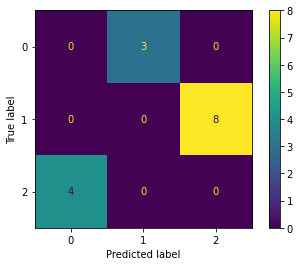

In [59]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x_train, y_train)
pred_kmeans = kmeans.predict(x_test)
print(accuracy_score(y_test, pred_kmeans))
print(classification_report(y_test, pred_kmeans))

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, pred_kmeans)

## KNN

In [60]:
#GridSearchCV for n_neighbors

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

knn_parameters = {"n_neighbors": range(1, 100)}
knn_gridsearch = GridSearchCV(KNeighborsRegressor(), knn_parameters)
knn_gridsearch.fit(x_train, y_train)
knn_gridsearch.best_params_

{'n_neighbors': 3}

## K-Means

c:\Users\Pichau\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


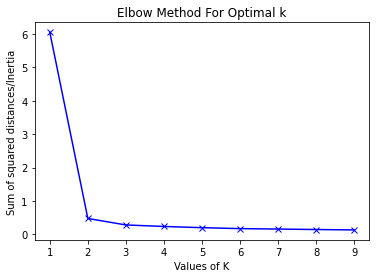

In [61]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(x_train)
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

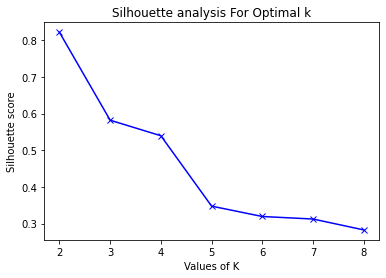

In [62]:
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []

for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(x_train)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(x_train, cluster_labels))


plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

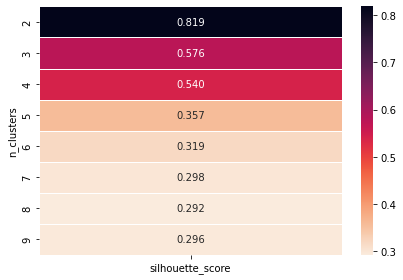

In [63]:
clusters_range = range(2,10)
results = []

for c in clusters_range:
    clusterer = KMeans(n_clusters=c, n_init=100, random_state=0)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    results.append([c,silhouette_avg])
    
result = pd.DataFrame(results, columns=['n_clusters','silhouette_score'])
pivot_km = pd.pivot_table(result, index='n_clusters', values='silhouette_score')

plt.figure()
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

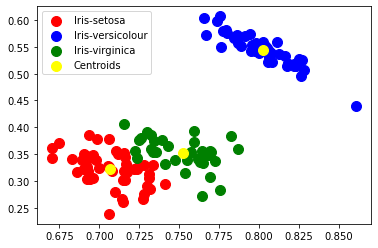

In [64]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x_train)

plt.scatter(x_train[y_kmeans == 0, 0], x_train[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x_train[y_kmeans == 1, 0], x_train[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x_train[y_kmeans == 2, 0], x_train[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

## Decision Tree

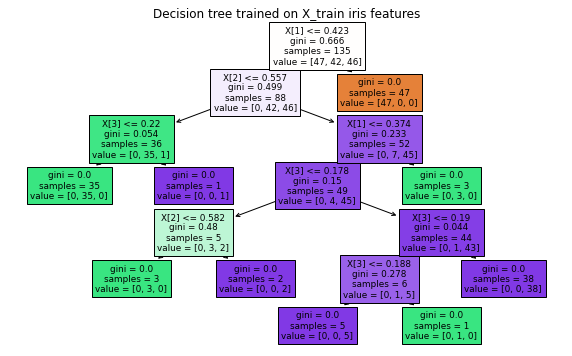

In [65]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10,6))
clf = DecisionTreeClassifier().fit(x_train, y_train)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on X_train iris features")
plt.show()